In [185]:
import numpy as np
import random
import pickle
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [5]:
pkl_file = open('ucpd_vol.pkl', 'rb')
ucpd_vol = pickle.load(pkl_file)
pkl_file.close()

In [6]:
features = ['gid','best', 'low',  'high', 'log_best', 'log_low', 'log_high'] # ucpd_vol[:,:,:,0:6]

In [7]:
ucpd_vol.shape

(31, 360, 720, 7)

In [32]:
ucpd_vol_count = np.count_nonzero(ucpd_vol[:,:,:,4], axis = 0)
ucpd_vol_count.shape

(360, 720)

In [33]:
# nonzero = np.nonzero(ucpd_vol_count)

nonzero = np.where(ucpd_vol_count >= 1) # number of events so >= 1 or >0 is the same as np.nonzero

nonzero_row = nonzero[0]
nonzero_col = nonzero[1]

nonzero_coord = [(row, col) for row, col in zip(nonzero_row, nonzero_col)]

In [296]:
len(nonzero_coord)

5895

In [93]:
nonzero_coord[0:5]

[(57, 506), (59, 560), (60, 420), (61, 396), (63, 427)]

In [202]:
nonzero_coord[0]

(57, 506)

In [104]:
dim = 16
h = ucpd_vol.shape[1]
w = ucpd_vol.shape[2]

In [297]:
len(nonzero_coord) * dim * dim # maks different squares

1509120

In [238]:
random.choice(nonzero_coord)

(133, 526)

In [275]:
dim = 16
h = ucpd_vol.shape[1]
w = ucpd_vol.shape[2]

sub_images_y = []
sub_images_x = []

draws = 100

for i in range(draws):
    
    coord = random.choice(nonzero_coord)

    new_y = np.random.randint(coord[0]-dim/2,coord[0]+dim/2)
    max_y = new_y + 8
    min_y = new_y - 8

    new_x = np.random.randint(coord[1]-dim/2,coord[1]+dim/2)
    max_x =  new_x + 8
    min_x = new_x - 8
    
    sub_images_y.append((min_y,max_y))
    sub_images_x.append((min_x,max_x))
    

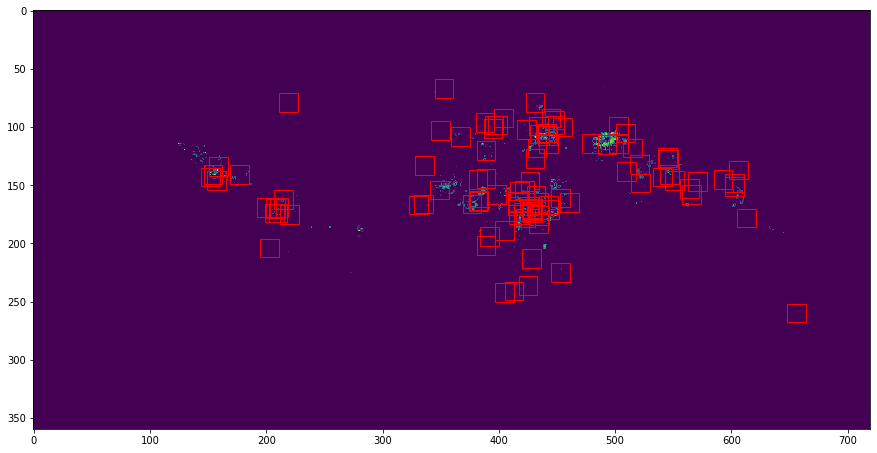

In [276]:
plt.figure(figsize = [15,15])
plt.imshow(ucpd_vol[-1,:,:,4])

for i in range(100):
    left, bottom, width, height = (sub_images_x[i][0], sub_images_y[i][0], 16, 16)
    rect = Rectangle((left, bottom), width, height, facecolor="none", edgecolor='red', lw=1)
    plt.gca().add_patch(rect) 

plt.show()

In [295]:
ucpd_vol[:, sub_images_y[0][0]:sub_images_y[0][1], sub_images_x[0][0]:sub_images_x[0][1], 4].shape

(31, 16, 16)

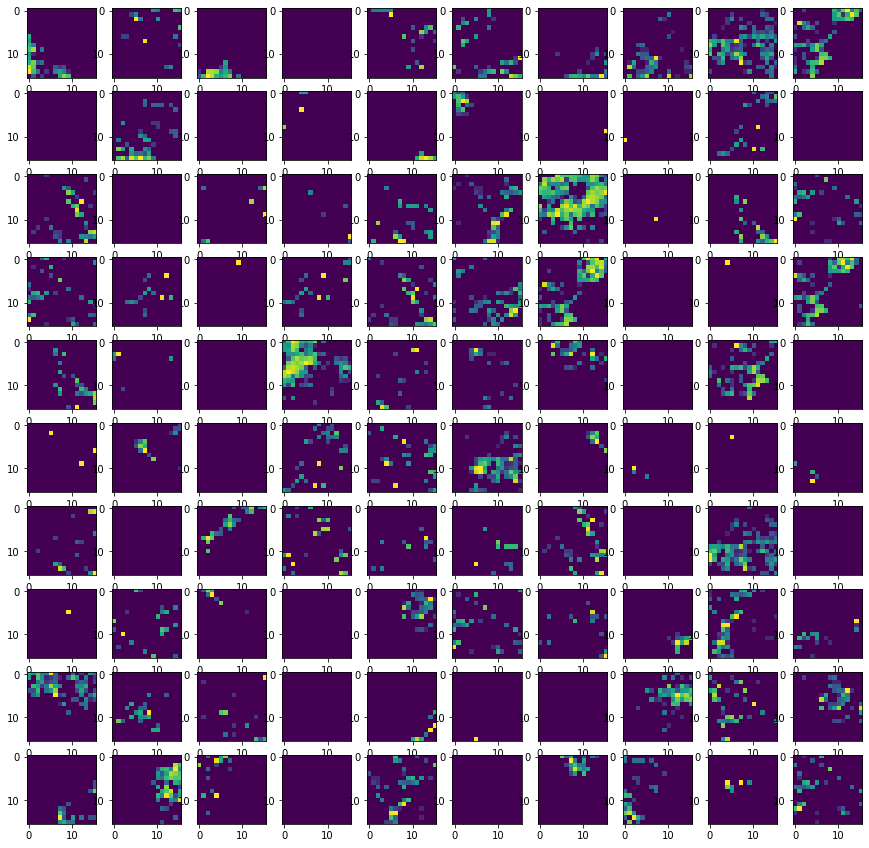

In [294]:
plt.figure(figsize = [15,15])

for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(ucpd_vol[30, sub_images_y[i][0]:sub_images_y[i][1], sub_images_x[i][0]:sub_images_x[i][1], 4])

plt.show()